In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
init_notebook_mode(connected=True) #required to run plotly in offline mode

In [2]:
data = pd.read_csv("examData.csv")
data = shuffle(data)
data.head()

,exam1,exam2,result
27,93.114389,38.800670,0
84,80.366756,90.960148,1
86,42.075455,78.844786,0
63,30.058822,49.592974,0
71,64.039320,78.031688,1


In [3]:
results = [1 , 0]
fig = {
    'data': [
        {
            'x': data.loc[(data['result']==result), 'exam1'] ,
            'y': data.loc[(data['result']==result),'exam2'],
            'name': result, 'mode': 'markers',
        } for result in results
    ],
    'layout': {
        'title': 'exam1 vs exam2',
        'xaxis': {'title': 'exam2'},
        'yaxis': {'title': "exam1"}
    }
}
py.offline.iplot(fig)

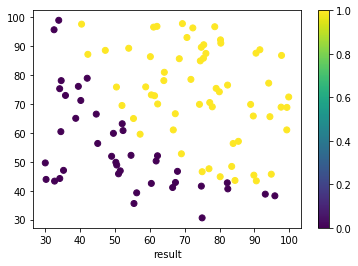

In [4]:
plt.xlabel(data.columns[2])
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=data.iloc[:,2])
plt.colorbar()

In [5]:
X = data.iloc[: , : 2]
Y = data.iloc[: , 2:]
X['exam1'] -= X['exam1'].mean()
X['exam1'] /= X['exam1'].max()
X['exam2'] -= X['exam2'].mean()
X['exam2'] /= X['exam2'].max()
x_train = X.iloc[:int(X.shape[0] * .7) , :]
y_train = Y.iloc[:int(Y.shape[0] * .7) , :]
x_test = X.iloc[int(X.shape[0] * .7): , :]
y_test = Y.iloc[int(Y.shape[0] * .7): , :]
lambdda = 0
x_axis = []
y_axis = []

In [6]:
intercept = np.ones((x_train.shape[0], 1))
x_train = np.concatenate((intercept, x_train), axis=1)
intercept = np.ones((x_test.shape[0], 1))
x_test = np.concatenate((intercept, x_test), axis=1)
theta = np.zeros((x_train.shape[1] , 1))

In [7]:
def gradient_descent(X, h, y):
    return (np.dot(X.T, (h - y))) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return ((1 - (learning_rate* lambdda)/y_train.shape[0])*weight - learning_rate*(gradient))
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))

In [8]:
epochs = 10000
for i in range(epochs):
    h = sigmoid(x_train, theta)
    loss = (h - y_train)**2
    x_axis.append(i)
    y_axis.append(np.average(loss))
    gradient = gradient_descent(x_train, h, y_train)
    theta = update_weight_loss(theta, 0.01, gradient)
print(theta)

[[0.80839652]
 [3.88242408]
 [3.33182292]]


In [9]:
result = sigmoid(x_test , theta)
c = 0
y_test = y_test.values

In [10]:
for i in range(x_test.shape[0]):
    if(round(float(result[i])) == float(y_test[i])):
        c += 1

In [11]:
accuracy = c/y_test.shape[0]
print("accuracy:" , accuracy * 100) 

accuracy: 93.33333333333333


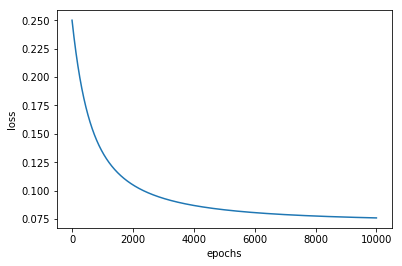

In [12]:
plt.plot(x_axis , y_axis)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [13]:
theta

array([[0.80839652],
       [3.88242408],
       [3.33182292]])

In [14]:
w = theta.flatten()

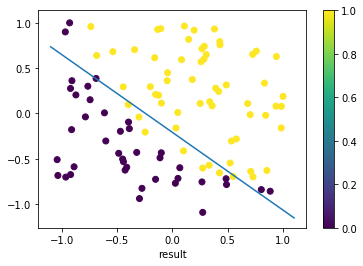

In [15]:
def calc(x):
    return (-(w[0]/w[1]) - (w[2]/w[1]) * x)

xx = np.linspace(-1.1,1.1)
yy = calc(xx)
X = X.values
Y = Y.values
plt.plot(xx,yy)
plt.xlabel(data.columns[2])
plt.scatter(X[: , 0],X[: , 1],c = Y[: ,0])
plt.colorbar()